### Importing Libraries & Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("restaurants.csv")
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


### Normalizing the Ratings 

In [33]:
def z_norm(x):
    z_x = ((x - df["Rating"].mean())/df["Rating"].std())
    return z_x
new_df = df["Rating"].apply(lambda x : z_norm(x))
new_df

0       0.017612
1       0.316105
2       0.166859
3       0.166859
4       0.465352
          ...   
6588    0.017612
6589    0.465352
6590   -4.609040
6591    0.316105
6592   -0.430129
Name: Rating, Length: 6593, dtype: float64

### Calculating Weighted Rating (WR)

In [34]:
df["WR"] = df["Rating"] * df["Votes"]
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,9901.5
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,10160.9
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,21067.2
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,11848.2
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,4813.6


### Normalizing WR using Linear Scaling

In [38]:

def lin_scale(x, xmin, xmax):
    x1 = ((x-xmin)/(xmax - xmin))
    return x1
xmax = df["WR"].max()
xmin = df["WR"].min()

df["WR"] = df["WR"].apply(lambda x: lin_scale(x,xmin,xmax))
df.head()

    

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,0.469971
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,0.482284
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,1.000000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,0.562380
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,0.228451


### Top 10 Restaurants 

In [40]:
b_r = df.sort_values(["WR"], ascending = 0)
b_r[["Name", "Locality", "WR", "Cost"]].head(10)

,Name,Locality,WR,Cost
2,Tamasha,Central Delhi,1.000000,2000
31,Boa Village,North Delhi,0.890763,2000
2219,Byg Brewski Brewing Company,South Bangalore,0.730981,1500
51,AIR An Ivory Region,West Delhi,0.620852,1200
92,TOS - Take Off Scarlet,West Delhi,0.565527,1200
3,The Junkyard Cafe,Central Delhi,0.562380,1800
19,Lord of the Drinks,Central Delhi,0.537059,2000
3398,Flechazo,West Hyderabad,0.526801,1300
308,Jazbaa Lounge and Bar,West Delhi,0.524660,1600
155,Uncultured Cafe & Bar,South Delhi,0.520046,1500


### Most Expensive Restaurants 

In [41]:
e_r = df.sort_values(["Cost"], ascending = 0)
e_r[["Name", "Locality", "WR", "Cost" ]].head(10)

,Name,Locality,WR,Cost
1672,Masque,South Mumbai,0.005630,8000
632,Kheer,South Delhi,0.065897,6000
199,Le Cirque,South Delhi,0.005174,5000
944,Seasonal Tastes,Gurgaon,0.061568,5000
119,Sevilla,Central Delhi,0.065318,5000
1267,Celini,Bandra,0.010158,5000
467,Del,South Delhi,0.151190,5000
1223,Masala Library by Jiggs Kalra,Bandra,0.049928,5000
3614,Cloud dining,West Hyderabad,0.010206,5000
6295,MoMo Cafe – The Multi Cuisine Restaurant,East Agra,0.002677,5000


### Cheapest Restaurants 

In [ ]:
c_r = df.sort_values(["Cost"], ascending = 1)
c_r[["Name", "Locality", "WR", "Cost" ]].head(10)

### Most Value For Money Restaurants [VFM = Cost / WR]

In [48]:
df["VFM"] = df["WR"]/df["Cost"]

In [51]:
vfm_data = df.sort_values(["VFM"], ascending = 0)
vfm_data.head(10)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR,VFM
254,Imly,"Rajouri Garden, West Delhi",West Delhi,Delhi,"Street Food, North Indian, Chinese, South I...",4.1,2243,800,0.436495,0.000546
51,AIR An Ivory Region,"Punjabi Bagh, West Delhi",West Delhi,Delhi,"North Indian, Continental, Oriental , Itali...",4.0,3270,1200,0.620852,0.000517
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,1.000000,0.000500
2219,Byg Brewski Brewing Company,"Sarjapur Road, South Bangalore",South Bangalore,Bangalore,"North Indian, Italian, Continental, South I...",4.4,3500,1500,0.730981,0.000487
92,TOS - Take Off Scarlet,"Punjabi Bagh, West Delhi",West Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",3.9,3055,1200,0.565527,0.000471
31,Boa Village,"The Exchange Store Building,Civil Lines, North...",North Delhi,Delhi,"Asian, Chinese, Japanese, Korean",4.4,4265,2000,0.890763,0.000445
3398,Flechazo,"Sun Towers,Madhapur, West Hyderabad",West Hyderabad,Hyderabad,Multi-Cuisine,4.1,2707,1300,0.526801,0.000405
155,Uncultured Cafe & Bar,"Kailash Colony, South Delhi",South Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",4.3,2548,1500,0.520046,0.000347
187,Imly,"Ashok Vihar Phase - 2, North Delhi",North Delhi,Delhi,"Street Food, North Indian, Chinese, South I...",4.2,1363,800,0.271696,0.000340
308,Jazbaa Lounge and Bar,"Rajouri Garden, West Delhi",West Delhi,Delhi,"Multi-Cuisine, North Indian, Italian, Chine...",4.1,2696,1600,0.524660,0.000328


### Restaurants in Connaught Place

In [102]:
def getLoc(x):
    if len(x)==3:
        return x[1]
    else:
        return x[0]

df["Area"] = df["Location"].str.split(",")
df["Area"] = df["Area"].apply(lambda x : getLoc(x))
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR,VFM,Area
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,0.469971,0.000235,Connaught Place
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,0.482284,0.000322,Connaught Place
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,1.000000,0.000500,Connaught Place
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,0.562380,0.000312,Connaught Place
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,0.228451,0.000114,Connaught Place


In [107]:
cp = df[df["Area"] == "Connaught Place"]
cp

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR,VFM,Area
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000,0.469971,2.349854e-04,Connaught Place
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500,0.482284,3.215229e-04,Connaught Place
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000,1.000000,5.000000e-04,Connaught Place
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800,0.562380,3.124331e-04,Connaught Place
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000,0.228451,1.142256e-04,Connaught Place
...,...,...,...,...,...,...,...,...,...,...,...
81,Baluchi,"The Lalit New Delhi,Connaught Place, Central D...",Central Delhi,Delhi,"North Indian, Mughlai",4.4,310,4000,0.064701,1.617520e-05,Connaught Place
82,The Connaught Bar,"Radisson Blu Marina,Connaught Place, Central D...",Central Delhi,Delhi,Finger Food,3.7,23,2200,0.003992,1.814626e-06,Connaught Place
83,Kapurthala Kitchen,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Chinese, Continental",2.9,20,1200,0.002706,2.254797e-06,Connaught Place
85,Giani,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Desserts, Ice Cream, Shakes",3.0,2,400,0.000237,5.933676e-07,Connaught Place


### BEST South Indian Restaurant in Delhi

In [116]:
si = df.loc[(df["City"] == "Delhi") & (df["Cuisine"] == "South Indian")]
si.sort_values("WR", ascending = 0).head(1)

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,WR,VFM,Area
105,Naivedyam,"East Patel Nagar, West Delhi",West Delhi,Delhi,South Indian,4.3,453,500,0.092418,0.000185,East Patel Nagar


### Average Cost for Food By City 

/var/folders/rv/67x1p4hs0078j_v2wqtwvn2h0000gn/T/ipykernel_2386/3571212392.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  av = df.groupby("City").mean()


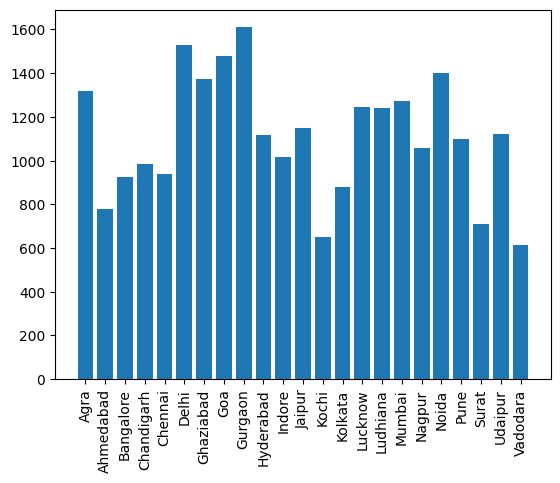

In [81]:
av = df.groupby("City").mean()
av = av["Cost"]
cities = [city for city, x in df.groupby("City")]
plt.xticks(rotation = 90)
plt.bar(cities,av)
plt.show()
